# ZHVI Forecasting with three different models

This notebook runs three other notebooks that each implement a different forecasting model to forecast future values of the [Zillow Home Value Index (ZHVI)](https://www.zillow.com/research/data/).  
The three models implemented are: Prophet, Vector Autoregression (VAR), and Bayesian Vector Autoregression (BVAR).

**Notebooks run by this notebook:**
- Prophet.ipynb
- Vector_Autoregression_Model_Generalized.ipynb
- BVAR - Generalized.ipynb
    
**Data required to run this notebook:**    
- [ZHVI](https://www.zillow.com/research/data/) (by metropolitan statistical area)
- [Unemployment Rate](https://fred.stlouisfed.org/series/UNRATE) (by metropolitan statistical area)
- [30yr Fixed Mortgage Rate](https://fred.stlouisfed.org/series/MORTGAGE30US) (national)
- [Consumer Price Index](https://fred.stlouisfed.org/series/MEDCPIM158SFRBCLE) (national)
- [New single-family homes sold](https://www.census.gov/econ/currentdata/?programCode=RESSALES&startYear=2000&endYear=2023&categories[]=SOLD&dataType=COMPED&geoLevel=US&adjusted=0&notAdjusted=1&errorData=0) (national)
- [New single-family homes for sale](https://www.census.gov/econ/currentdata/?programCode=RESCONST&startYear=1959&endYear=2023&categories[]=APERMITS&dataType=TOTAL&geoLevel=US&adjusted=1&notAdjusted=0&errorData=0) (national)

**Data needs to be in the form of:**
- cleaned_df.pkl
    - this is the ZHVI after being prepared by Cleaning.ipynb.
- fulldataframe.pkl
    - this is the ZHVI and the exogenous variables after being prepared by Data Compilation.ipynb.


**The packages required to run this notebook include:**
- Prophet
    - Documentation: [facebook](https://facebook.github.io/prophet/docs/quick_start.html)
    - To install: pip install prophet
- statsmodels Vector Autoregressions
    - Documentation: [statsmodels](https://www.statsmodels.org/dev/vector_ar.html)
    - To install: pip install statsmodels
- Xarray
    - Documentation: [Xarray](https://docs.xarray.dev/en/stable/)
    - To install: pip install xarray
    
- ArviZ
    - Documentation: [ArviZ](https://python.arviz.org/en/latest/)
    - To install: pip install arviz    

- PyMC
    - Documentation: [PyMC](https://www.pymc.io/projects/docs/en/stable/learn.html)
    - To install: conda install -c conda-forge pymc    
    
**To run this code:**
1. *Choose desired location (metropolitan statistical area)*
2. *Choose forecast horizon*
3. *Tweak parameters if desired*
4. *Run All*

## Inputs

Location and Forecast Length

In [1]:
location = "LosAngelesCA" # run the code chunk below for a list of the metropolitan areas in the data
forecast_horizon = 12 # (months); recommended: 12

In [2]:
# metropolitan statistical areas in the data
#df = pd.read_pickle('data/cleaned_df.pkl'); [df.columns[1:][x] for x in range(len(df.columns[1:]))]

Model Parameters  

**VAR**

In [3]:
# AIC, BIC, HQIC, FPE are measures of predictive accuracy which will help choose the number of lags (p)
# Akaike's Information Criterion (AIC) - Penalizes the fit of the model with the number of parameters that are estimated
# Bayesian Information Criterion (BIC) - Penalizes the number of parameters more heavily than the AIC and recommended for VAR
# Hannan-Quinn Information Criterion (HQIC) - Similar to BIC, but not asymptotically efficient. Not recommended.
# Final Prediction Error (FPE) - Not an information criterion, but is an option when trying to minimize error. Not recommended. 

info_criterion = "BIC" # choices: AIC or BIC; recommended: BIC

**Prophet**

In [4]:
# Proportion of the history in which the trend is allowed to change
changepoint_range=0.95 # reasonable: [0.8, 0.95]; recommended: 0.95

# How much the trend changes at the trend changepoints
changepoint_prior_scale=0.5 # reasonable: [0.001, 0.5]; recommended: 0.5

**BVAR**

In [5]:
# Number of autoregression lags
num_lags = 2

# Make True to run cross validation to get the MAPE. NOTE: This process takes ~20 minutes
bvar_cv = False

## Models

### Prophet

15:55:29 - cmdstanpy - INFO - Chain [1] start processing
15:55:30 - cmdstanpy - INFO - Chain [1] done processing


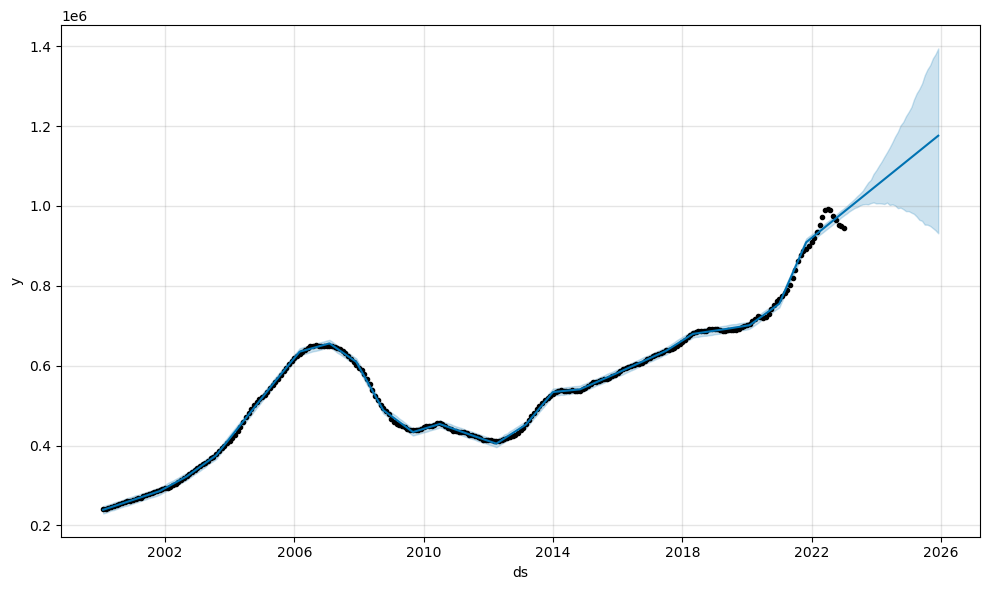

  0%|          | 0/21 [00:00<?, ?it/s]

15:55:30 - cmdstanpy - INFO - Chain [1] start processing
15:55:30 - cmdstanpy - INFO - Chain [1] done processing
15:55:30 - cmdstanpy - INFO - Chain [1] start processing
15:55:30 - cmdstanpy - INFO - Chain [1] done processing
15:55:30 - cmdstanpy - INFO - Chain [1] start processing
15:55:30 - cmdstanpy - INFO - Chain [1] done processing
15:55:30 - cmdstanpy - INFO - Chain [1] start processing
15:55:30 - cmdstanpy - INFO - Chain [1] done processing
15:55:30 - cmdstanpy - INFO - Chain [1] start processing
15:55:31 - cmdstanpy - INFO - Chain [1] done processing
15:55:31 - cmdstanpy - INFO - Chain [1] start processing
15:55:31 - cmdstanpy - INFO - Chain [1] done processing
15:55:31 - cmdstanpy - INFO - Chain [1] start processing
15:55:31 - cmdstanpy - INFO - Chain [1] done processing
15:55:31 - cmdstanpy - INFO - Chain [1] start processing
15:55:31 - cmdstanpy - INFO - Chain [1] done processing
15:55:31 - cmdstanpy - INFO - Chain [1] start processing
15:55:31 - cmdstanpy - INFO - Chain [1]

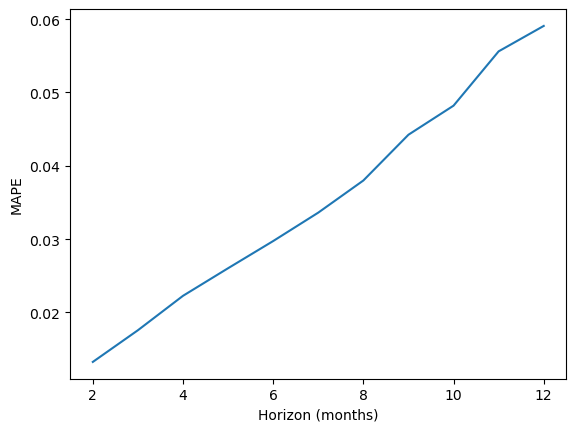

In [6]:
# Figure 1: Future Forecast
# Figure 2: MAPE relative to forecast horizon length
%run ./Prophet.ipynb

### VAR

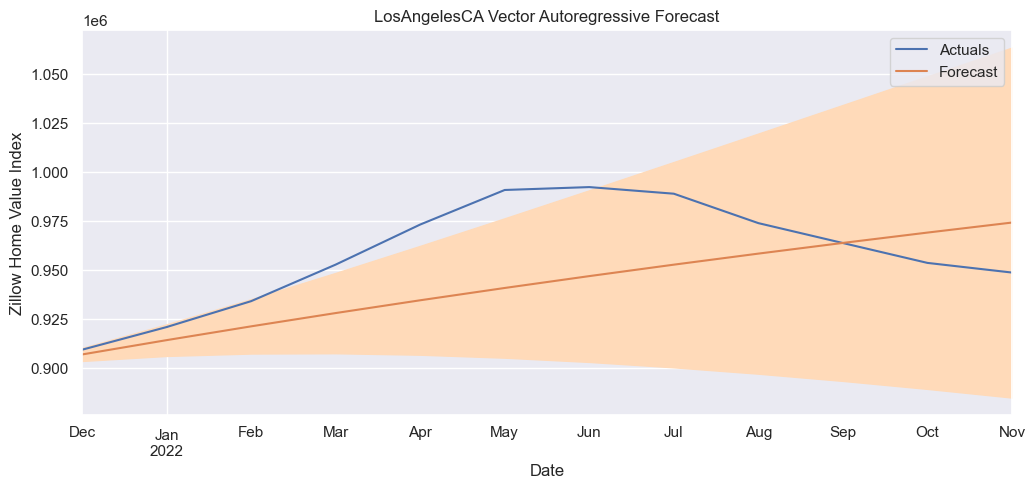

MAPE: 0.1988789230495547
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           63     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67624D+01    |proj g|=  1.11320D-01


 This problem is unconstrained.



At iterate    5    f=  1.67620D+01    |proj g|=  7.10273D-02

At iterate   10    f=  1.67618D+01    |proj g|=  3.17118D-02

At iterate   15    f=  1.67617D+01    |proj g|=  7.47615D-03

At iterate   20    f=  1.67617D+01    |proj g|=  2.32303D-02

At iterate   25    f=  1.67617D+01    |proj g|=  5.20918D-03

At iterate   30    f=  1.67617D+01    |proj g|=  5.36383D-03

At iterate   35    f=  1.67616D+01    |proj g|=  6.20837D-03

At iterate   40    f=  1.67616D+01    |proj g|=  3.01743D-03

At iterate   45    f=  1.67616D+01    |proj g|=  6.82490D-03

At iterate   50    f=  1.67616D+01    |proj g|=  1.23659D-02

At iterate   55    f=  1.67616D+01    |proj g|=  1.72544D-03

At iterate   60    f=  1.67616D+01    |proj g|=  2.29724D-03

At iterate   65    f=  1.67616D+01    |proj g|=  1.51836D-03

At iterate   70    f=  1.67616D+01    |proj g|=  9.48670D-04

At iterate   75    f=  1.67616D+01    |proj g|=  8.31141D-04

At iterate   80    f=  1.67616D+01    |proj g|=  2.09831D-03

At iter

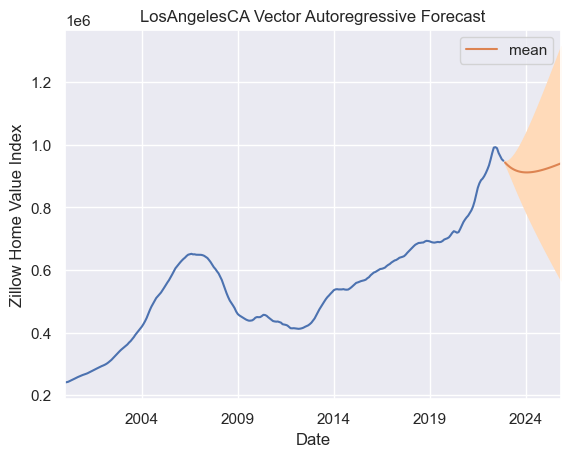

In [7]:
# Figure 1: In sample forecast
# Figure 2: Future Forecast
%run ./Vector_Autoregression_Model_Generalized.ipynb

### Bayesian VAR

In [9]:
# Figure 1: Future Forecast
# Figure 2: Posterior Predictive Check Plot
%run ./BVAR\ -\ Generalized.ipynb

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, lag_coefs, noise]
Traceback (most recent call last):
  File "/Users/grainneoneill/opt/anaconda3/lib/python3.9/multiprocessing/forkserver.py", line 274, in main
    code = _serve_one(child_r, fds,
  File "/Users/grainneoneill/opt/anaconda3/lib/python3.9/multiprocessing/forkserver.py", line 313, in _serve_one
    code = spawn._main(child_r, parent_sentinel)
  File "/Users/grainneoneill/opt/anaconda3/lib/python3.9/multiprocessing/spawn.py", line 125, in _main
    prepare(preparation_data)
  File "/Users/grainneoneill/opt/anaconda3/lib/python3.9/multiprocessing/spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "/Users/grainneoneill/opt/anaconda3/lib/python3.9/multiprocessing/spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "/Users/grainneoneill/opt/anaconda3/lib/p

BrokenPipeError: [Errno 32] Broken pipe

AssertionError: 

## Summary Results

In [ ]:
results = pd.DataFrame([[round(prophet_final), round(prophet_final_lower), round(prophet_final_upper)],
                        [round(var_final), round(var_final_lower), round(var_final_upper)],
                        [round(bvar_final_mean), round(bvar_final_lower), round(bvar_final_upper)]],
                       columns = [str(forecast_horizon)+" month out value", "Lower bound", "Upper bound"],
                      index = ["Prophet", "VAR", "BVAR"])
results